In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
enr = pd.read_csv("/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/fgsea.csv", index_col=0)

In [9]:
enr

,pathway,pval,padj,ES,NES,nMoreExtreme,size,col,method
1,actin filament organization (GO:0007015),0.650071,0.972028,0.624388,0.937543,456,21,X0,mofa
2,activation of cysteine-type endopeptidase acti...,0.217143,0.972028,0.806654,1.185045,151,17,X0,mofa
3,activation of GTPase activity (GO:0090630),0.048571,0.958442,0.877363,1.300501,33,19,X0,mofa
4,activation of protein kinase activity (GO:0032...,0.605960,0.972028,-0.528925,-0.885482,182,19,X0,mofa
5,adenylate cyclase-activating G protein-coupled...,0.309353,0.972028,-0.633064,-1.119863,85,24,X0,mofa
...,...,...,...,...,...,...,...,...,...
19886,"transcription, DNA-templated (GO:0006351)",0.709291,0.769656,0.853618,0.986764,709,19,X49,mowgli
19887,transforming growth factor beta receptor signa...,0.356643,0.591106,0.911822,1.055384,356,18,X49,mowgli
19888,transmembrane receptor protein serine/threonin...,0.328671,0.591106,0.911491,1.046245,328,23,X49,mowgli
19889,transmembrane receptor protein tyrosine kinase...,0.048951,0.591106,0.922739,1.049963,48,67,X49,mowgli


In [12]:
# Aie Aie
enr[enr["padj"] < .05]

,pathway,pval,padj,ES,NES,nMoreExtreme,size,col,method


In [13]:
enr = enr[enr["pval"] < .05]

In [14]:
enr["minlogp"] = -np.log10(enr["pval"])

<ipython-input-14-ea61b6049753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr["minlogp"] = -np.log10(enr["pval"])


In [15]:
enr.head()

,pathway,pval,padj,ES,NES,nMoreExtreme,size,col,method,minlogp
3,activation of GTPase activity (GO:0090630),0.048571,0.958442,0.877363,1.300501,33,19,X0,mofa,1.313619
7,anterograde trans-synaptic signaling (GO:0098916),0.040650,0.958442,-0.812714,-1.444751,9,27,X0,mofa,1.390935
12,B cell activation (GO:0042113),0.035920,0.958442,0.901434,1.317028,24,16,X0,mofa,1.444669
35,cellular response to interferon-gamma (GO:0071...,0.006720,0.958442,0.911585,1.404908,4,25,X0,mofa,2.172603
52,collagen fibril organization (GO:0030199),0.036984,0.958442,0.877224,1.317185,25,21,X0,mofa,1.431982


## Count enrichments

In [16]:
enr.groupby("method").count().reset_index()

,method,pathway,pval,padj,ES,NES,nMoreExtreme,size,col,minlogp
0,mofa,216,216,216,216,216,216,216,216,216
1,mowgli,1670,1670,1670,1670,1670,1670,1670,1670,1670


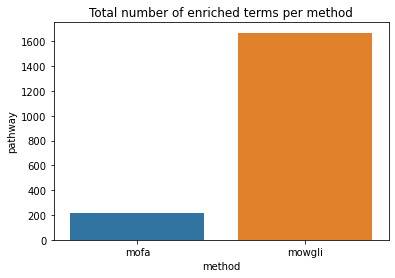

In [18]:
plt.title("Total number of enriched terms per method")
sns.barplot(data=enr.groupby("method").count().reset_index(), x="method", y="pathway")
plt.show()

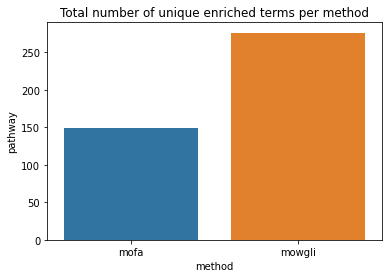

In [20]:
plt.title("Total number of unique enriched terms per method")
sns.barplot(data=enr.groupby("method")["pathway"].nunique().reset_index(), x="method", y="pathway")
plt.show()

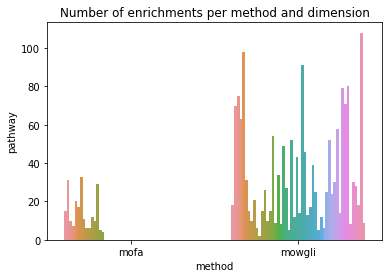

In [21]:
fig, ax = plt.subplots(1, 1)
sns.barplot(data=enr.groupby(["method", "col"])["pathway"].count().reset_index(), x="method", y="pathway", hue="col", ax=ax)
ax.get_legend().remove()
ax.set_title("Number of enrichments per method and dimension")
plt.show()

<ipython-input-22-93d6431397ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr["nfactors"] = 0
<ipython-input-22-93d6431397ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr.loc[nfactors.index, "nfactors"] = nfactors


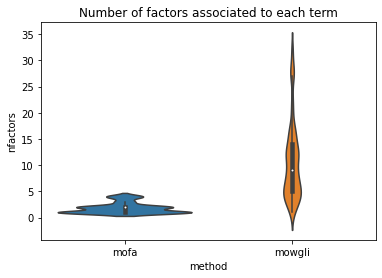

<ipython-input-22-93d6431397ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr["ndim"] = 0
<ipython-input-22-93d6431397ce>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr["propfactors"] = enr["nfactors"] / enr["ndim"]
<ipython-input-22-93d6431397ce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

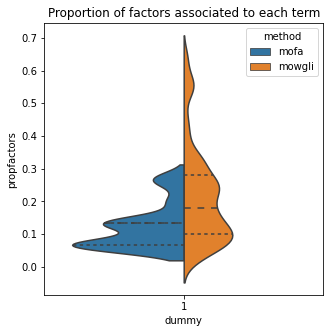

In [22]:
enr["nfactors"] = 0
nfactors = enr.groupby(["pathway", "method"])["pathway"].count()
enr.set_index(["pathway", "method"], inplace=True)
enr.loc[nfactors.index, "nfactors"] = nfactors
enr.reset_index(inplace=True)

plt.title("Number of factors associated to each term")
sns.violinplot(data=enr, x="method", y="nfactors")
plt.show()

enr["ndim"] = 0
enr.loc[enr["method"] == "mofa", "ndim"] = 15
enr.loc[enr["method"] == "mowgli", "ndim"] = 50
enr["propfactors"] = enr["nfactors"] / enr["ndim"]
enr["dummy"] = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("Proportion of factors associated to each term")
sns.violinplot(data=enr, x="dummy", hue="method", y="propfactors", split=True, ax=ax, inner="quart")
plt.show()

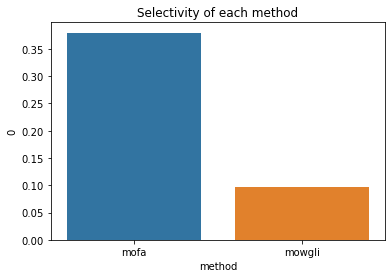

In [25]:
selectivity = (enr.groupby("method")["pathway"].nunique() + enr.groupby("method")["col"].nunique()) / (2*enr.groupby("method")["pathway"].count())
plt.title("Selectivity of each method")
sns.barplot(data=pd.DataFrame(selectivity).reset_index(), x="method", y=0)
plt.show()